# Homework Part a
**Goal:** *load the dataset in an iPython notebook (3 points)*

In [1]:
# import statements uesd for entire assignment
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Get data from the URL and read into a python DataFrame
urlPath = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'
raw_data = pd.read_csv(urlPath, header=None) # leave room to add header in later pre-processing
raw_data

,0,1,2,3,4,5,6,7,8
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,05,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


# Homework Part c
**Goal:** *Perform any necessary preprocessing steps. Explain why each step is needed. Use the markdown cells of your notebook for explanations (8 points).*

In [3]:
# add in column names
explore = raw_data
explore.columns = ['L-CORE','L-SURF','L-O2','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT', 'DECISION ADM-DECS']

In the above cell, it was necessary to provide column headers for the information obtained as using **read_csv()** was primarily used for ensure the data was imported. The **header=None** command ensured their would be open space within the python DataFrame to ensure that columns could be added without replacing any data. Without this space, the first line would be assumed to be the headers and data would be lost in filing up the header making the DataFrame have a shape of (89, 9) instead of (90, 9).

In [4]:
# remove "?" from data
explore = explore.replace('?', np.nan)
explore = explore.replace('A ', 'A')
explore = explore.dropna()

In the above cell, it was necessary to replace the missing data denoted by *"?"* as it would result in error when attempting to visualize data effectively. Thus the **np.replace()** function was used to replace the elements with missing values with *"NaN"*. Also the **np.replace()** function was used to remove excess spacing in discharge decision column. This was necessary for proper relationship plotting of patient decisions classified as *'A'*. Then, using the **pd.DataFrame.dropna()** function, all the rows containing missing values where removed. This was done due to the patient specificity of of each comfort rating. It would not be effective to replace with other values as they would not represent the patient specific definition of comfort at discharge.

In [5]:
# ensure that comfort data is a numeric type rather than strings for future visualization
explore['COMFORT'] = pd.to_numeric(explore['COMFORT'])
explore

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,DECISION ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,5,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


In the above cell, it was necessary to convert between the python *object* data type to a *int64* data type in order to plot the comfort score approapriately with the other attributes which have various classifications.

# Homework Part b
**Goal:** *Explore the dataset using a plot to show the relationship between each one of the categorical features and “comfort”. Interpret the results in a markdown cell (7 points).*

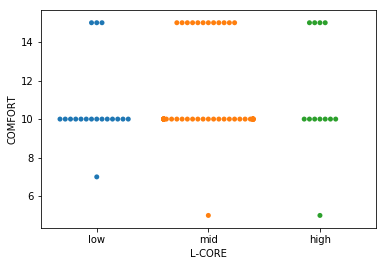

In [6]:
sns.swarmplot(x='L-CORE', y='COMFORT', order=['low','mid','high'], data=explore) # L-CORE VS COMFORT

**Plot of L-CORE vs COMFORT:** Patient comfort rating was evaluted here in relation to patient's internal temperature with three classifications: *'low', 'mid', and 'high'*. Patients whose internal temperature was maintained between 36 and 37 degrees Celcius, corresponding to *'mid'*, where more likely to provide higher comfort scores than those whose internal temperature was above 37 degrees Celcius, corresponding to *'high'*. Overall, the greatest distribution of comfort values falls within the *'mid'* classication indicating that there is a significant relationship between patient internal temperatue being between 36 and 37 degrees Celcius and their perceived comfort at discharge.

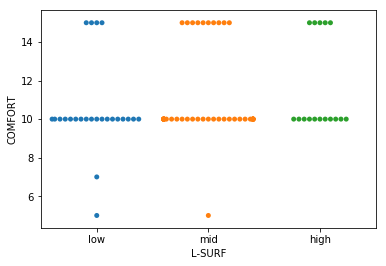

In [7]:
sns.swarmplot(x='L-SURF', y='COMFORT', order=['low','mid','high'], data=explore) # L-SURF VS COMFORT

**Plot of L-SURF vs COMFORT:** Patient comfort rating was evaluted here in relation to patient's surface temerature with three classifications: *'low', 'mid', and 'high'*. Patients whose surface temperature is reported to be *'low'* or *'mid'* reported a comfort level of 10 more frequently compared to those in the high category.In comarison of those classificed as *'low'* or *'mid'*, it was more likely that those with *'mid'* surface temperature would more frequently report a high comfort rating. This data illustrates a correlation between surface body temperature being less than or equal to 36.5 degrees Celcius. 

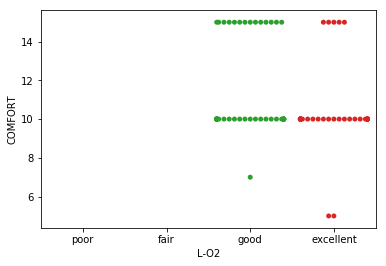

In [8]:
sns.swarmplot(x='L-O2', y='COMFORT', order=['poor','fair','good', 'excellent'], data=explore) # L-O2 VS COMFORT

**Plot of L-O2 vs COMFORT:** Patient comfort rating was evaluted here in relation to oxygen saturation with four classifications: *'poor', 'fair', 'good', and 'excellent'*. Of the patients with comfort scores, their oxygen saturation was either *'good'* or *'excellent'*. Of those whose oxygen saturation was *'good'* or *'excellent'*, more patients whose oxygen saturation was *'good'* reported both high and middle comfort scores more frequently than those whose oxygen saturation was *'excellent'*. This data illustrates a potential correlation between oxygen saturation and comfort with a stronger relationship between oxygen saturation being between 90 and 98 percent (i.e. *'good'*) than an oxygen saturation of greater than 98 percent (i.e. *'excellent'*).

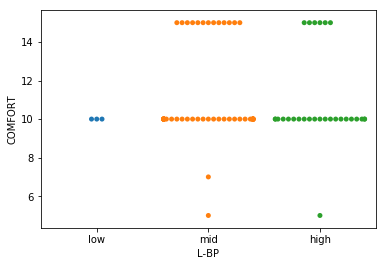

In [9]:
sns.swarmplot(x='L-BP', y='COMFORT', order=['low','mid','high'], data=explore) # L-BP VS COMFORT

**Plot of L-BP vs COMFORT:** Patient comfort rating was evaluted here in relation to blood pressure with three classifications: *'low', 'mid', and 'high'*. Most of the data is distrubuted within the *'mid'* and *'high'* classifications with most frequent comfort level at 10. Between these two classifications, *'mid'* contained more patients who experienced a high comfort level compared to *'high'*. While it can be seen that patients whose blood pressure is recorded to be 90/70 or greater gave comfort levels at or above 10, the relationship between patient comfort at discharge and blood pressure is uncertain. This is due to both range and frequency of comfort levels indicated within these two classifications.

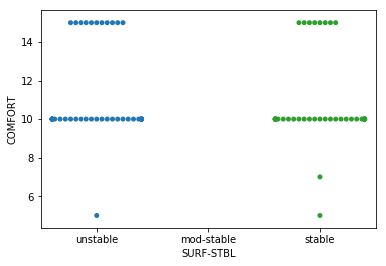

In [10]:
sns.swarmplot(x='SURF-STBL', y='COMFORT', order=['unstable','mod-stable', 'stable'],data=explore) # SURF-STBL VS COMFORT

**Plot of SURF-STBL vs COMFORT:** Patient comfort rating was evaluted here in relation to the stability of patient's surface temperature with three classifications: *'unstable', 'mod-stable', and 'stable'*. There is a fairly large distribution of reported comfort levels of 10 between both patients that fall within the *'stable'* and *'unstable'* classifications for patient's surface temperature. There where no patients who fell within the *'mod-stable'* classification. Both the range and frequency of recorded comfort levels for patient's with *'stable'* and *'unstable'* is very close. Thus, this data does not illustrate a significant relationship between comfort at discharge and the stability of patient's surface temperature.

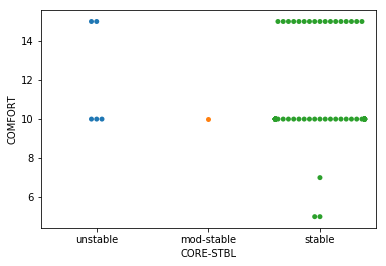

In [11]:
sns.swarmplot(x='CORE-STBL', y='COMFORT', order=['unstable','mod-stable','stable'], data=explore) # CORE-STBL VS COMFORT

**Plot of CORE-STBL vs COMFORT:** Patient comfort rating was evaluted here in relation to the stability of patient's core temperature with three classifications: *'unstable', 'mod-stable', and 'stable'*. Most of the data falls within the category of *'stable'*. This is to say that most patients with stable core temperature reported comfort levels of 10 or higher with significant number of patients indicating a comfort level of 15. Thus, this data does illustrate a significant relationship between patient's comfort at discharge and the stability of their core temperature.

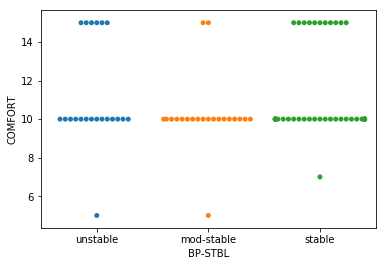

In [12]:
sns.swarmplot(x='BP-STBL', y='COMFORT', order=['unstable','mod-stable','stable'], data=explore) # BP-STBL VS COMFORT

**Plot of BP-STBL vs COMFORT:** Patient comfort rating was evaluted here in relation to the stability of patient's blood pressure with three classifications: *'unstable', 'mod-stable', and 'stable'*. A significant number of comfort level values of 10 where reported through all the categories with slight increasing frequency of comfort level 10 recorded in moving from *'unstable'* to *'stable'*. The greatest frequency of high levels of comfort was reported for the *'stable'* group. This data suggests that patients with more stable blood pressure, especially those in the *'stable'* classification, experienced more comfort levels of 10 or higher; however, given the frequency of comfort level 10 within both *'unstable'* and *'mod-stable'*, this relationship may not be a strong relationship but a notable one.

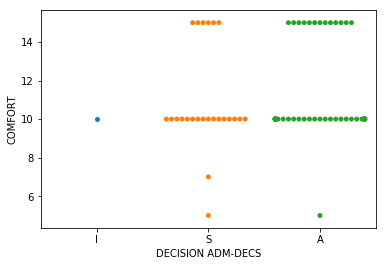

In [13]:
sns.swarmplot(x='DECISION ADM-DECS', y='COMFORT', order=['I', 'S', 'A'], data=explore) # DECISION ADM-DECS VS COMFORT

**Plot of DECISION ADM-DECS vs COMFORT:** Patient comfort rating was evaluted here in relation to the discharge decision with three classifications: *'I', 'S', and 'A'*. The distribution of data falls largely within the *'S'* and *'A'* categories with the *'A'* cagetorgy of patients containing the greatest frequency of comfort levels at or above 10. Given the greater frequency of favorable comfort levels within the *'A'* classification, it would seem that patients experienced greater comfort when sent to general hospital floor. This data illustrates that there is a relationship between patients discharge location and their experienced comfort with a greater chance of higher comfort experienced from the decision to send patients to general hospital floor.

# Homework Part d
**Goal:** *Create a GitHub repository and share your code via GitHub with the instructor by submitting the link on Canvas (2 points).*

See code here: https://github.com/mdelbasha/BME4760_HW1.git